# Redes Neurais Artificiais 2025.2


## Implementação de Redes Neurais com Sci-Kit Learn

* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)


### Contexto: Consumo de Combustível

O objetivo desta atividade prática é utilizar as ferramentas de Machine Learning no ambiente Python com o uso das bibliotecas pandas e sci-kit learn para prever o consumo de combustível de veículos.

### Base de Dados

Disponível em: https://archive.ics.uci.edu/ml/datasets/auto+mpg

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [71]:
"""
Módulo de importação de bibliotecas essenciais para a atividade de Redes Neurais Artificiais.

Este módulo carrega as principais bibliotecas utilizadas ao longo do notebook:
- pandas: manipulação e análise de dados
- numpy: operações numéricas e matemáticas
- matplotlib.pyplot e seaborn: visualização de dados
- scikit-learn: criação, treinamento e avaliação de modelos de Machine Learning
"""

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão de dados em treino e teste
from sklearn.model_selection import train_test_split

# Normalização dos dados
from sklearn.preprocessing import StandardScaler

# Modelo de Rede Neural Perceptron Multicamadas
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# Métricas de avaliação de regressão
from sklearn.metrics import mean_squared_error, r2_score

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Verificação de importações concluída
print("Bibliotecas importadas com sucesso.")


Bibliotecas importadas com sucesso.


### Abertura do Dataset

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [72]:
"""
Função: Carregamento e visualização inicial do dataset Auto MPG.

Esta célula realiza a leitura correta do arquivo CSV usando o separador ';',
exibe as primeiras linhas para verificar a importação e mostra informações gerais
sobre a estrutura do conjunto de dados.
"""

# [ACT] Carregar o dataset com separador correto ';'
df = pd.read_csv("autompg.csv", sep=';')

# [ASSERT] Exibir as 5 primeiras linhas do dataset
print("✅ Dataset carregado com sucesso! Exibindo as primeiras linhas:\n")
display(df.head())

✅ Dataset carregado com sucesso! Exibindo as primeiras linhas:



,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para as seguintes perguntas:

1. Quantos exemplos há no dataset?
2. Quais os atributos existentes no dataset?
3. Quais os nomes dos carros existentes no dataset?
4. Quais as características do 'chevrolet camaro'?
5. Qual a média de consumo, em galões por litro, dos carros existentes no dataset?

In [73]:
"""
Função: Exibir a quantidade total de exemplos no dataset.

Esta célula retorna o número de registros (linhas) contidos na base de dados,
permitindo avaliar o tamanho da amostra disponível para treinamento e teste.
"""

# [ACT] Obter o número total de exemplos
total_exemplos = df.shape[0]

# [ASSERT] Exibir o resultado
print(f"📊 O dataset possui {total_exemplos} exemplos (linhas).")


📊 O dataset possui 406 exemplos (linhas).


In [74]:
"""
Função: Exibir todos os atributos (colunas) disponíveis no dataset em formato de tabela.

Além de listar os nomes das colunas, esta célula exibe o tipo de dado e a quantidade
de valores não nulos em cada uma delas.
"""

# [ACT] Criar uma tabela com as principais informações do dataset
info_tabela = pd.DataFrame({
    "Coluna": df.columns,
    "Valores Não Nulos": df.count().values,
    "Total de Linhas": [df.shape[0]] * len(df.columns),
    "Valores Nulos": df.isnull().sum().values,
    "Tipo de Dado": df.dtypes.values
})

# [ASSERT] Exibir a tabela de informações gerais
print("📊 Informações gerais do dataset:\n")
display(info_tabela.style.set_table_styles(
    [
        {'selector': 'th', 'props': [('background-color', '#2E8B57'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('padding', '6px 12px')]}
    ]
).set_caption("Resumo Estrutural do Dataset"))


📊 Informações gerais do dataset:



,Coluna,Valores Não Nulos,Total de Linhas,Valores Nulos,Tipo de Dado
0,mpg,398,406,8,float64
1,cylinders,406,406,0,float64
2,displacement,406,406,0,float64
3,horsepower,400,406,6,float64
4,weight,406,406,0,float64
5,acceleration,406,406,0,float64
6,modelyear,406,406,0,float64
7,origin,406,406,0,float64
8,name,406,406,0,object


In [75]:
"""
Função: Listar todos os nomes de carros presentes no dataset.

Esta célula permite verificar quais modelos de veículos estão incluídos na base,
o que é útil para filtragens e análises específicas posteriormente.
"""

# [ACT] Verificar se a coluna 'name' existe e listar os nomes únicos
if 'name' in df.columns:
    nomes_carros = df['name'].unique()

    print("🚗 Nomes de carros no dataset:\n")
    for carro in nomes_carros:
        print("-", carro)
else:
    print("⚠️ A coluna com o nome dos carros não foi encontrada. Verifique o nome exato no dataset.")


🚗 Nomes de carros no dataset:

- chevrolet chevelle malibu
- buick skylark 320
- plymouth satellite
- amc rebel sst
- ford torino
- ford galaxie 500
- chevrolet impala
- plymouth fury iii
- pontiac catalina
- amc ambassador dpl
- citroen ds-21 pallas
- chevrolet chevelle concours (sw)
- ford torino (sw)
- plymouth satellite (sw)
- amc rebel sst (sw)
- dodge challenger se
- plymouth 'cuda 340
- ford mustang boss 302
- chevrolet monte carlo
- buick estate wagon (sw)
- toyota corona mark ii
- plymouth duster
- amc hornet
- ford maverick
- datsun pl510
- volkswagen 1131 deluxe sedan
- peugeot 504
- audi 100 ls
- saab 99e
- bmw 2002
- amc gremlin
- ford f250
- chevy c20
- dodge d200
- hi 1200d
- chevrolet vega 2300
- toyota corona
- ford pinto
- volkswagen super beetle 117
- plymouth satellite custom
- ford torino 500
- amc matador
- pontiac catalina brougham
- dodge monaco (sw)
- ford country squire (sw)
- pontiac safari (sw)
- amc hornet sportabout (sw)
- chevrolet vega (sw)
- pontiac fir

In [76]:
"""
Função: Exibir todas as características do carro 'Chevrolet Camaro'.

Esta célula realiza uma busca textual no DataFrame e retorna todas as linhas que
contêm o nome 'chevrolet camaro', permitindo analisar seus atributos completos.
"""

# [ACT] Verificar se a coluna 'name' existe
if 'name' in df.columns:
    # Filtrar registros que contenham 'chevrolet camaro' (sem diferenciar maiúsculas e minúsculas)
    camaro = df[df['name'].str.contains("chevrolet camaro", case=False, na=False)]

    # [ASSERT] Exibir as características encontradas
    if not camaro.empty:
        print("📋 Características do Chevrolet Camaro:\n")
        display(camaro)
    else:
        print("⚠️ Nenhum modelo 'chevrolet camaro' foi encontrado no dataset.")
else:
    print("❌ A coluna com os nomes dos carros ('name') não foi encontrada no dataset.")

📋 Características do Chevrolet Camaro:



,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro


In [77]:
"""
Função: Calcular a média de consumo em quilômetros por litro (km/L).

A base fornece o consumo em milhas por galão (mpg). 
Esta célula converte para km/L usando as relações:
- 1 milha ≈ 1.60934 km
- 1 galão ≈ 3.78541 litros
"""

# [ACT] Criar nova coluna com consumo convertido para km/L
df['km_por_litro'] = ((df['mpg'] * 1.60934) / 3.78541).round(2)

# [ASSERT] Calcular e exibir a média geral do consumo
media_consumo = df['km_por_litro'].mean()

print(f"⛽ Média de consumo dos veículos: {media_consumo:.2f} km/L")


⛽ Média de consumo dos veículos: 10.00 km/L


### Preparação dos dados

1. Existem exemplos com dados faltantes. Para fins de simplificação, elimine-os do dataset.
2. Exclua a coluna com os nomes dos carros
3. Converta mpg para km/l sabendo que: 1 mpg  = 0.425 km/l. Utilize apenas duas casas decimais nesta conversão.
4. Remova a coluna mpg e insira a coluna kml no dataset.

In [78]:
"""
Função: Remover exemplos com dados faltantes do dataset.

Esta célula elimina todas as linhas que contêm valores ausentes (NaN),
garantindo que o conjunto de dados esteja limpo e adequado para o treinamento.
"""

# [ACT] Remover linhas com valores nulos
df = df.dropna()

# [ASSERT] Exibir informações atualizadas
print("✅ Dados faltantes removidos com sucesso.")
print(f"📊 O dataset agora possui {df.shape[0]} exemplos e {df.shape[1]} atributos.")


✅ Dados faltantes removidos com sucesso.
📊 O dataset agora possui 392 exemplos e 10 atributos.


In [79]:
"""
Função: Remover a coluna com os nomes dos carros do dataset.

Esta célula exclui a coluna 'name', que contém texto e não será utilizada como
atributo preditivo no modelo de rede neural.
"""

# [ACT] Remover a coluna 'name' se existir
if 'name' in df.columns:
    df = df.drop(columns=['name'])
    print("✅ Coluna 'name' removida com sucesso.")
else:
    print("⚠️ A coluna 'name' não foi encontrada no dataset.")


✅ Coluna 'name' removida com sucesso.


In [80]:
"""
Função: Converter a coluna 'mpg' em 'kml' (quilômetros por litro).

Sabendo que 1 mpg = 0.425 km/L, esta célula cria uma nova coluna 'kml'
com valores arredondados para duas casas decimais.
"""

# [ACT] Criar a nova coluna convertida
df['kml'] = (df['mpg'] * 0.425).round(2)

# [ASSERT] Exibir amostra da conversão
print("✅ Conversão concluída. Exemplo dos primeiros valores:")
display(df[['mpg', 'kml']].head())


✅ Conversão concluída. Exemplo dos primeiros valores:


,mpg,kml
0,18.0,7.65
1,15.0,6.38
2,18.0,7.65
3,16.0,6.80
4,17.0,7.22


In [81]:
"""
Função: Remover a coluna 'mpg' original do dataset.

Como a coluna 'kml' já contém os valores convertidos, a coluna 'mpg'
não será mais necessária e deve ser excluída.
"""

# [ACT] Remover coluna mpg se existir
if 'mpg' in df.columns:
    df = df.drop(columns=['mpg'])
    print("✅ Coluna 'mpg' removida com sucesso.")
else:
    print("⚠️ A coluna 'mpg' não foi encontrada no dataset.")

# [ASSERT] Mostrar as colunas atuais após a preparação
print("\n📊 Colunas atuais do dataset:")
print(df.columns.tolist())


✅ Coluna 'mpg' removida com sucesso.

📊 Colunas atuais do dataset:
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear', 'origin', 'km_por_litro', 'kml']


### Organização dos dados para treinamento

1. Remova a coluna kml e atribua-a a uma variável Y
2. Atribua os demais valores do dataset a uma variável X
3. Efetue uma partição holdout 70/30 com o sklearn

In [82]:
"""
Função: Separar a variável alvo (kml) do restante do dataset.

Nesta célula, removemos a coluna 'kml' do DataFrame e a armazenamos
na variável Y, que representará a variável dependente a ser prevista.
"""

# [ACT] Separar variável alvo (Y)
Y = df['kml']

# [ACT] Criar variável X com os demais atributos
X = df.drop(columns=['kml'])

# [ASSERT] Verificar dimensões das variáveis criadas
print("✅ Variáveis separadas com sucesso:")
print(f"📈 X (atributos de entrada): {X.shape}")
print(f"🎯 Y (variável alvo): {Y.shape}")


✅ Variáveis separadas com sucesso:
📈 X (atributos de entrada): (392, 8)
🎯 Y (variável alvo): (392,)


In [83]:
"""
Função: Atribuir os demais atributos do dataset à variável X.

Esta célula cria a matriz de entrada (features) que será usada como 
entrada da rede neural para prever a variável alvo.
"""

# [ACT] Criar X com todas as colunas, exceto 'kml'
X = df.drop(columns=['kml'])

# [ASSERT] Exibir dimensões e amostra dos dados
print("✅ Variável 'X' criada com sucesso.")
print(f"📈 Dimensão de X: {X.shape}")
display(X.head())

✅ Variável 'X' criada com sucesso.
📈 Dimensão de X: (392, 8)


,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,km_por_litro
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,7.65
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,6.38
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,7.65
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,6.80
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,7.23


In [84]:
"""
Função: Realizar a partição Holdout do conjunto de dados.

Nesta célula, dividimos o dataset em:
- 70% para treinamento do modelo
- 30% para teste e avaliação

A função `train_test_split` do scikit-learn é utilizada para essa divisão.
"""

# [ACT] Importar a função necessária
from sklearn.model_selection import train_test_split

# [ACT] Realizar a divisão do dataset (70% treino, 30% teste)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42
)

# [ASSERT] Exibir o tamanho de cada subconjunto
print("✅ Partição realizada com sucesso!")
print(f"📊 Conjunto de treinamento: {X_train.shape[0]} exemplos")
print(f"🧪 Conjunto de teste: {X_test.shape[0]} exemplos")


✅ Partição realizada com sucesso!
📊 Conjunto de treinamento: 274 exemplos
🧪 Conjunto de teste: 118 exemplos


### Treinamento de um modelo de regressão linear

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

In [85]:
# ✅ Importação da classe LinearRegression concluída no início do notebook.

In [86]:
"""
Função: Instanciar o modelo de Regressão Linear.

Nesta célula, criamos um objeto do modelo `LinearRegression` utilizando os
parâmetros padrão. Esse objeto será usado para treinar e realizar previsões.
"""

# [ACT] Instanciar o modelo
regr = LinearRegression()

# [ASSERT] Confirmação
print("✅ Modelo de Regressão Linear instanciado com sucesso.")

✅ Modelo de Regressão Linear instanciado com sucesso.


In [87]:
"""
Função: Treinar o modelo de Regressão Linear com os dados de treino.

Nesta célula, utilizamos o método `.fit()` para ajustar o modelo aos dados.
O modelo aprenderá a relação entre as variáveis de entrada (X_train) e a
variável alvo (Y_train).
"""

# [ACT] Treinar o modelo
regr.fit(X_train, Y_train)

# [ASSERT] Confirmação
print("✅ Modelo treinado com sucesso.")

✅ Modelo treinado com sucesso.


### Teste do modelo

Vamos observar a saída do modelo para um exemplo individual existente nos dados de treino:
* Atributos preditores: X_test[2:3]
* Atributo alvo: Y_test.iloc[2]
* Qual o resultado previsto para o modelo, dados estes atributos preditores?

In [88]:
"""
Função: Testar o modelo de Regressão Linear com um exemplo individual (saída formatada).

Nesta célula, utilizamos o modelo treinado para prever o valor da variável alvo 
para um exemplo específico do conjunto de teste. Em seguida, comparamos a previsão 
com o valor real de forma organizada e legível.
"""

# [ACT] Selecionar um exemplo individual do conjunto de teste
X_exemplo = X_test.iloc[2:3]
Y_real = Y_test.iloc[2]

# [ACT] Gerar a previsão do modelo
Y_previsto = regr.predict(X_exemplo)[0]

# [ASSERT] Exibir os resultados formatados
print("=== Teste do Modelo com um Exemplo Individual ===\n")

print("📊 Atributos preditores utilizados:\n")
display(X_exemplo.style.set_properties(**{'text-align': 'center'}).set_caption("Exemplo selecionado do conjunto de teste"))

print("\n🎯 Resultado da previsão:")
print(f"- Valor real do consumo (kml):     {Y_real:.2f}")
print(f"- Valor previsto pelo modelo:      {Y_previsto:.2f}")

# [INFO] Comparação do erro absoluto
erro_abs = abs(Y_real - Y_previsto)
print(f"- Erro absoluto da previsão:       {erro_abs:.4f} km/L")


=== Teste do Modelo com um Exemplo Individual ===

📊 Atributos preditores utilizados:



,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,km_por_litro
255,4.000000,91.000000,60.000000,1800.000000,16.400000,78.000000,3.000000,15.350000



🎯 Resultado da previsão:
- Valor real do consumo (kml):     15.34
- Valor previsto pelo modelo:      15.35
- Erro absoluto da previsão:       0.0054 km/L


### Teste do modelo

1. Obtenha o R^2 para os dados de teste
 * Efetue a importação de r2_score do pacote sklearn.metrics
 * Trata-se de um valor no intervalo [0,1]
 * Quanto mais próximo de 1, melhor é o modelo

In [90]:
"""
Função: Calcular e exibir o coeficiente de determinação (R²) do modelo.

O R² mede a proporção da variabilidade da variável dependente que é explicada
pelo modelo. Valores mais próximos de 1 indicam melhor desempenho.
"""

# [ACT] Fazer previsões para o conjunto de teste
Y_pred = regr.predict(X_test)

# [ACT] Calcular o coeficiente de determinação R²
r2 = r2_score(Y_test, Y_pred)

# [ASSERT] Exibir o resultado de forma organizada
print("=== Avaliação do Modelo de Regressão Linear ===\n")

print("Conjunto de Teste:")
print(f"- Total de exemplos avaliados: {X_test.shape[0]}\n")

print("Resultado do coeficiente de determinação (R²):")
print(f"- R² do modelo: {r2:.4f}\n")

# [INFO] Criar uma pequena tabela comparando valores reais e previstos
comparacao = pd.DataFrame({
    "Valor Real (kml)": Y_test.values[:10],
    "Valor Previsto (kml)": Y_pred[:10]
})

print("Amostra de previsões do modelo (primeiros 10 exemplos):\n")
display(comparacao.style.set_properties(**{'text-align': 'center'}).set_caption("Comparação entre valores reais e previstos"))


=== Avaliação do Modelo de Regressão Linear ===

Conjunto de Teste:
- Total de exemplos avaliados: 118

Resultado do coeficiente de determinação (R²):
- R² do modelo: 1.0000

Amostra de previsões do modelo (primeiros 10 exemplos):



,Valor Real (kml),Valor Previsto (kml)
0,11.050000,11.047102
1,9.180000,9.177559
2,15.340000,15.345380
3,11.050000,11.047279
4,11.480000,11.475838
5,11.900000,11.896568
6,5.520000,5.528302
7,11.050000,11.046740
8,8.070000,8.076394
9,12.320000,12.326234


### Obtendo e visualizando os resíduos

Uma maneira muito comum de visualizarmos o quão bom certo modelo é para aprender determinados padrões dá-se por meio da visualização dos resíduos, isto é, da diferença entre os valores previstos e observados. Adapte o código a seguir para calcular os resíduos produzidos pelo seu modelo.

=== Amostra dos resíduos calculados ===

86     0.002898
283    0.002441
255   -0.005380
63     0.002721
401    0.004162
212    0.003432
50    -0.008302
242    0.003260
159   -0.006394
124   -0.006234
Name: kml, dtype: float64

Resumo estatístico dos resíduos:
count    118.000000
mean      -0.000122
std        0.004826
min       -0.009259
25%       -0.005566
50%        0.002522
75%        0.003451
max        0.005567
Name: kml, dtype: float64


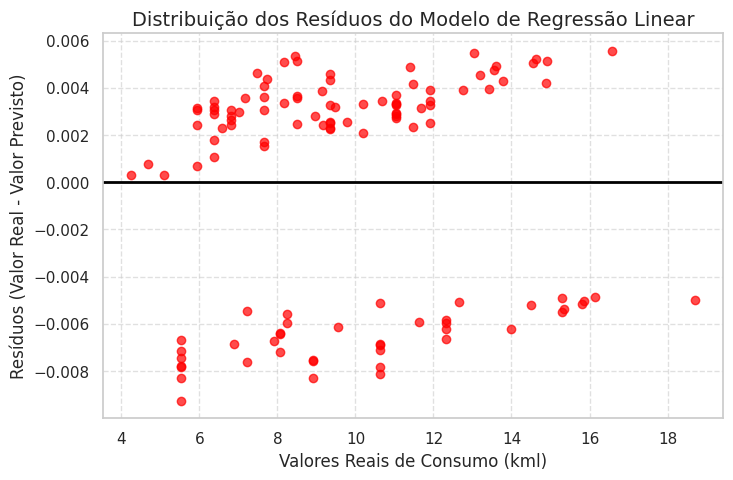

In [91]:
"""
Função: Calcular e visualizar os resíduos do modelo de regressão linear.

Os resíduos são a diferença entre os valores observados (reais) e os valores previstos pelo modelo.
Ao plotar esses resíduos, podemos avaliar se eles estão distribuídos de forma aleatória em torno de zero,
o que indica um bom ajuste do modelo.
"""

# [ACT] Calcular os resíduos
residuos = Y_test - Y_pred

# [ASSERT] Exibir amostra dos resíduos
print("=== Amostra dos resíduos calculados ===\n")
print(residuos.head(10))
print("\nResumo estatístico dos resíduos:")
print(residuos.describe())

# [ACT] Plotar os resíduos
plt.figure(figsize=(8, 5))
plt.axhline(y=0, color='black', linewidth=2)  # linha horizontal no zero
plt.scatter(Y_test, residuos, color='red', alpha=0.7)

plt.title("Distribuição dos Resíduos do Modelo de Regressão Linear", fontsize=14)
plt.xlabel("Valores Reais de Consumo (kml)", fontsize=12)
plt.ylabel("Resíduos (Valor Real - Valor Previsto)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
x = [0,int(max(Y_test))]
y = [0,0]
plt.plot(x,y,linewidth=3)
plt.plot(Y_test,residuos,'ro')
plt.ylabel('Residuos')
plt.xlabel('kml')
plt.show()

## Propondo RNAs MLP

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Proposição de uma RNA MLP de Camada Única

1. Consulte a documentação em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
2. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
3. Obtenha o $R^2$ do conjunto de testes

### Proposição de uma RNA MLP com duas camadas ocultas

1. Treine uma rede neural multilayer perceptron para este problema com duas camadas ocultas, com número de neurônios à sua escolha  
    2.1 Utilize a função de ativação ReLU  
    2.2 Utilize o solver Adam    
    2.3 Imprima o passo a passo do treinamento    
    2.4 Utilize o número máximo de épocas igual a 300
2. Obtenha o $R^2$ do conjunto de testes

### Para Discussão

- Qual melhor modelo para este problema? Justifique